#                                         Titanic DataSet Analysis


In [87]:
import csv
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns


For this analysis we are going to go through a titanic csv dataset and conduct an analytical investigation on what factors contributed to the survival of those who survived the titanic. 

For this analysis I will be focused on investigating the following questions about surviving the titanic.
1. Is there a gender gap between people who survived and people who died?
2. What is the age gap bewteen people who survived and people who lived?
3. What is the relationship between age and sex of survivor?
4. Is there a relationship between embarkment location and pclass to survival?

Finally, there is a conclusion about the data analysis and a recommendation for more indept analysis.


## Wrangling Data

 First we are going to acquire data by reading "Titanic_data.csv" with pandas

In [88]:
titanic_df = pd.read_csv("titanic_data.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Now we are going to check the data for any missing values by looking at each column

In [90]:
print "Titanic_df rows", len(titanic_df)

titanic_df.notnull().sum()


Titanic_df rows 891


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

###### Exploring "Cabin" since it is missing most of it's information.


In [91]:
#Printed how many passengers per class
print "Number of people per class"
print titanic_df.groupby("Pclass").count()["PassengerId"], "\n"

# Printed how many people are being accounted for per class in Cabins. The majority of 
# people not accounted for, people with NaN in Cabin, are in the third class.
print "Number of Cabin information that is not missing per class \n"
print titanic_df.groupby("Pclass").count()["Cabin"], "\n"

#All the NaN in each class for people without a cabin assigned.
print "All NaN in each ", titanic_df.groupby("Pclass").count()["PassengerId"] - titanic_df.groupby("Pclass").count()["Cabin"]


Number of people per class
Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64 

Number of Cabin information that is not missing per class 

Pclass
1    176
2     16
3     12
Name: Cabin, dtype: int64 

All NaN in each  Pclass
1     40
2    168
3    479
dtype: int64


# Men and Women on the Titanic

### Men and Women on the Titanic

Populating the interactive namespace from numpy and matplotlib


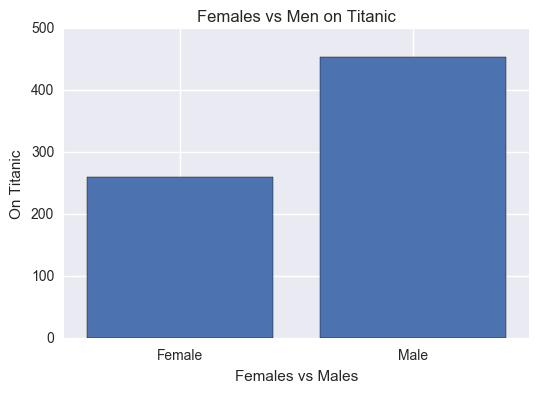

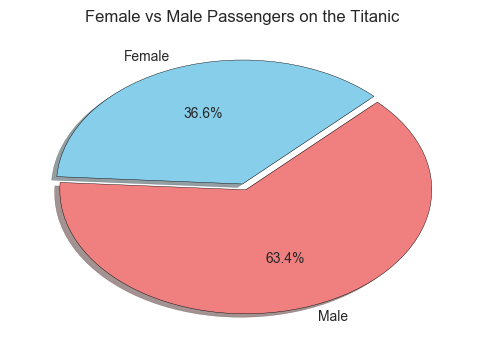

In [118]:
%pylab inline 
on_titanic = titanic_df.groupby("Sex")["Survived"]
gender = [1,2]
x_ticks = ["Female", "Male"]

plt.bar(gender, on_titanic.count(), align = "center")

plt.xticks(gender, x_ticks)
plt.xlabel("Females vs Males")
plt.ylabel("On Titanic")
plt.title("Females vs Men on Titanic")
plt.show()
labels = ['Female', 'Male']


sizes = on_titanic.count()

colors = ['skyblue', 'lightcoral']
explode = (0, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=45)
plt.title("Female vs Male Passengers on the Titanic")
plt.show()




### Men and Women who Survived Titanic


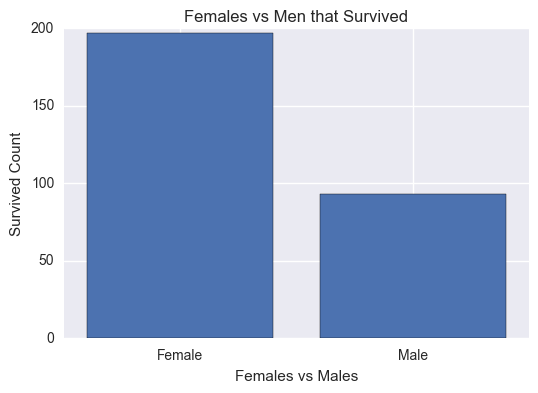

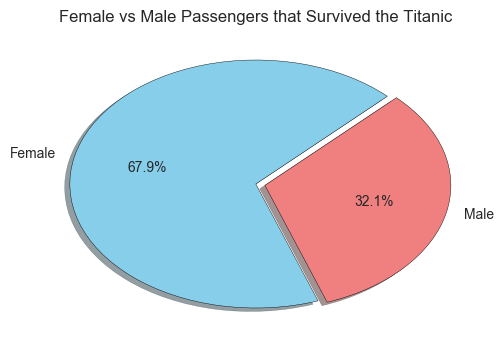

In [119]:
Gender = [1,2]
x_ticks = ["Female", "Male"]

plt.bar(Gender, on_titanic.sum(), align='center')

plt.xticks(Gender, x_ticks)
plt.xlabel("Females vs Males")
plt.ylabel("Survived Count")
plt.title("Females vs Men that Survived")
plt.show()

sizes = on_titanic.sum()

colors = ['skyblue', 'lightcoral']
explode = (0, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=45)
plt.title("Female vs Male Passengers that Survived the Titanic")
plt.show()




### Conclusion 

Although there were about twice as many men than women on the Titanic, proportionally, women survived as much as 3 times more often. There is a relationship between sex of passenger and survivor of the titanic.


# Analsysis of the Ages of the Survivors

#### I'm going to conduct an analysis that compares different age groups of passengers that survived or perish in order to investigate whether age played a role in survival.


First, we are going to create a new dataFrame so that we can keep our original dataFram titanic_df the same. We are going to drop all the rows that have na in the age column. 

In [94]:
titanic_age_drop =titanic_df


Going to remove all the row where there is an NA, so that I can perform the analysis on age. Going to only have 712 data points because I will be removing 177 rows because of NA age and 2 rows for NA Embarkment data

In [95]:
titanic_age_drop.dropna(subset = ["Age"], inplace = "True") #Remove all data points with no age


Now we are going to create 2 histograms. The first will show the Age Frequency of Survivors, and the second will demonstrate the Age Frequency of people that did not survive. This will help us visualize whether there is anything interesting before we dive deep into analysis.

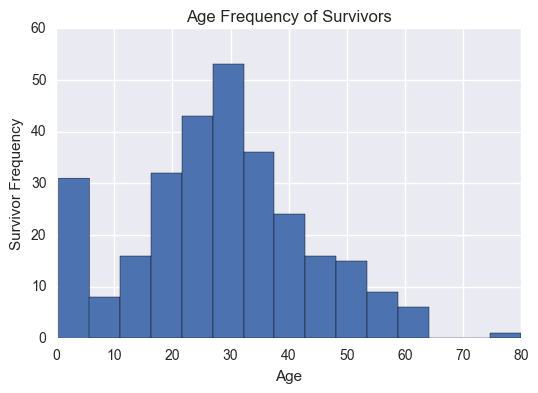

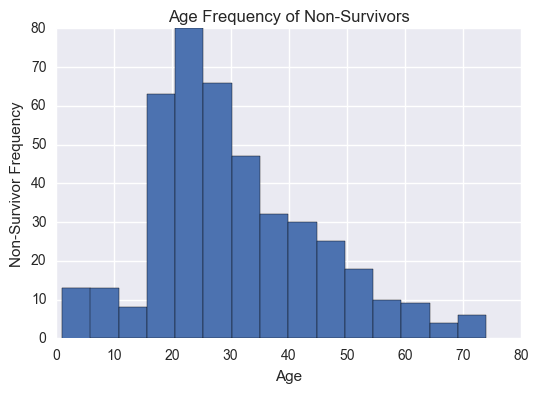

In [96]:
titanic_survived = titanic_age_drop[titanic_age_drop["Survived"]==1] #Number of Titanic survivors
titanic_died = titanic_age_drop[titanic_age_drop["Survived"]==0]     #Number of passengers that died on the Titanic
plt.hist(titanic_survived["Age"], bins = 15)
plt.title("Age Frequency of Survivors")
plt.xlabel("Age")
plt.ylabel("Survivor Frequency")
plt.show()

plt.hist(titanic_died["Age"], bins = 15)
plt.title("Age Frequency of Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Non-Survivor Frequency")
plt.show()


In order to fully test whether certain age intervals were more likely to survive others, I am going to add another column to the Data Frame called Age_bin, which is going to categorize everyone into age bins in intervals of 10 years.

In [97]:
titanic_age_assign = titanic_age_drop
def age_assign(age):
    if(age>=80):
        return "80+"
    elif(age>70):
        return "70-79"
    elif(age>60):
        return "60-69"
    elif(age>50):
        return "50-59"
    elif(age>40):
        return "40-49"
    elif(age>30):
        return "30-39"
    elif(age>20):
        return "20-29"
    elif(age>10):
        return "10-19"
    else:
        return "0-9"
    
#Assigning an age interval to each data row.
titanic_age_assign["Age_Bin"] = titanic_age_assign["Age"].apply(age_assign)
titanic_age_assign.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


In [98]:
#Get the proportion of survivors for each age interval
by_age_bins_mean = titanic_age_assign.groupby("Age_Bin")["Survived"].mean()

print "Proportion of survival for each age-interval"
pd.DataFrame(by_age_bins_mean.values, index =["0-9", "10-19", "20-29", "30-39", "40-49", "49-59", "60-69", "70-79", "80+"], columns = ["Proportion_of_Survival"])


Proportion of survival for each age-interval


,Proportion_of_Survival
0-9,0.593750
10-19,0.382609
20-29,0.365217
30-39,0.445161
40-49,0.383721
49-59,0.404762
60-69,0.235294
70-79,0.000000
80+,1.000000


### Conclusion

Age seems to be an indicator of survival on the titanic. Children had higher proportions of survival than any other age interval. Surprisingly, ages 30-39 was the second highest age indicator of survival and the outlier is the 80+ year old who survived. Therefore, there seems to be a relationship between age intervals and survival of the titanic.


# Analysis of Age and Sex of Survivors

We are going to analyze whether there is a relationship between age and sex of survivors. 

### Graphing Survivors of the Titanic vs Female Survivors vs Male Survivors

In [99]:
#Get the survival proportion for each gender in each age interval
survival_by_age_bins_gender= titanic_age_assign.groupby(["Age_Bin", "Sex"], as_index = False)["Survived"]
survival_by_age_bins_gender.sum()


,Age_Bin,Sex,Survived
0,0-9,female,19
1,0-9,male,19
2,10-19,female,34
3,10-19,male,10
4,20-29,female,61
5,20-29,male,23
6,30-39,female,46
7,30-39,male,23
8,40-49,female,21
9,40-49,male,12


We are going to group the data by Age_Bin and take the sum of survivors for each age bin. 
Afterwards, we are going to group the data again, but this time by Age_bin and Sex. We are there going to sum up the number of survivors per age interval for both male and female.

In [100]:
#Get Number of survivors on the titanic for each age interval
survivor = titanic_age_assign.groupby("Age_Bin")["Survived"].sum().values
survivor_sex = survival_by_age_bins_gender.sum()

#Get number of female and male survivors for each age bin in order to plot them
survivor_fe = survivor_sex[survivor_sex["Sex"]=="female"]["Survived"].values
survivor_male = survivor_sex[survivor_sex["Sex"]=="male"]["Survived"].values
survivor_female = np.append(survivor_fe, [0,0]) #Appended two zeroes to survival_female so that we can graph it male_survivor 
print survivor_female
print survivor_male
print survivor

[19 34 61 46 21 13  3  0  0]
[19 10 23 23 12  4  1  0  1]
[38 44 84 69 33 17  4  0  1]


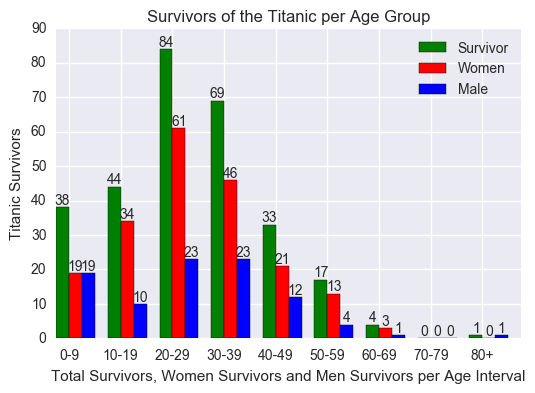

In [101]:


#Got an example of this code from http://matplotlib.org/examples/api/barchart_demo.html
#Adapted it to what I needed to plot my data

N = 9

ind = np.arange(N)  # the x locations for the groups
width = 0.25       # the width of the bars

fig, ax = plt.subplots()

rects1 = ax.bar(ind, survivor, width, color='g')

rects2 = ax.bar(ind + width, survivor_female, width, color='r')

rects3 = ax.bar(ind+ 2*width, survivor_male, width, color = "b")

# add some text for labels, title and axes ticks
ax.set_ylabel('Titanic Survivors')
ax.set_xlabel('Total Survivors, Women Survivors and Men Survivors per Age Interval')
ax.set_title('Survivors of the Titanic per Age Group')
ax.set_xticks(ind + width)
ax.set_xticklabels(('0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', "70-79", "80+"))

ax.legend((rects1[0], rects2[0], rects3[0]), ('Survivor', 'Women', "Male"))


def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()


From the visualization we can see the raw survivor numbers for women, men and the total survivors. In every age group, there are higher numbers for women survivors than men, except for children of ages 0-9. But, what is also important is whether the proportion of survivors relative to their respective populations are different for each age interval. For example, what proportion of women survived from the population of women in a certain age interval in comparison to men. 

In [102]:
print "Proportion of survival for each age interval by sex"
survival_by_age_bins_gender.mean()

Proportion of survival for each age interval by sex


,Age_Bin,Sex,Survived
0,0-9,female,0.612903
1,0-9,male,0.575758
2,10-19,female,0.739130
3,10-19,male,0.144928
4,20-29,female,0.753086
5,20-29,male,0.154362
6,30-39,female,0.836364
7,30-39,male,0.230000
8,40-49,female,0.677419
9,40-49,male,0.218182


In order to test whether the proportion of survivors in both the women and men populations for each interval have a true difference and are not just caused by a sampling error, we are going to perform statistical testing.

First, I am going to cut the last two rows from the DataFrame because no one survived between the ages 70-79 and for the age bin of 80+ there is only one male survived.

In [103]:
#Drop the last two rows, we do not need them.
#Made two. One of them is for means, the other for count of the DataFrame that removes the last two rows.
survival_by_age_bins_gender_final = survival_by_age_bins_gender.mean().drop(survival_by_age_bins_gender.mean().tail(2).index)
survival_by_age_bins_gender_final_count = survival_by_age_bins_gender.count().drop(survival_by_age_bins_gender.count().tail(2).index)


### Testing for statistical significance

###### Two-Tailed Independent Z-Test

We are going to perform a two-tailed independent proportion Z-test to compare both male and female survival proportions within each age interval at an $\alpha$ level of .05.
The independent variable is gender, which is either male or female, and the dependent variable is whether they survived or died on the titanic.

I am performing a Z-Test because I am comparing proportions of survival for the independent variable. The independent variables has two categories that are unrelatable and both the independent and dependent variable are categorical. For each dependent variable outcome we have at least 5 survival and 5 death outcomes, except for bin age 60-69.


Admittingly, what is missing is that the real population is not at least 20 times greater than my samples sizes.





###### Hypothesis

Null Hypothesis: The difference between the female and male population proportions of survival at each respective age interval is not statistically significant or, in other words, the difference is zero. That is $p_{female} = p_{male}$ or $ p_{female} - p_{male} = 0$.

Alternative Hypthothesis: The difference between the female and male population proportions of survival is statistically significant or, in other words, it is not zero. That is, $p_{female} \neq p_{male}$ or $ p_{female} - p_{male} \neq 0$

We are going to find the sample size for each age interval. First, we are going to delete the last two rows, because in those two rows, only men have survived. 

In [104]:
#We are going to drop the last two rows of the dataFrame because either no one survived in that age bin or
#It only has male survivors
#Count the N, the number of women and men in each age interval. 
survival_by_age_bins_size= survival_by_age_bins_gender_final_count
survival_by_age_bins_size_female = survival_by_age_bins_size[survival_by_age_bins_size["Sex"]=="female"]["Survived"]
survival_by_age_bins_size_male = survival_by_age_bins_size[survival_by_age_bins_size["Sex"]=="male"]["Survived"]


We are going to take the means, or proportions, for each gender in each age interval.

In [105]:
#Get the proportions of survival for male and female in each age interval
survival_by_age_bins_male_mean = survival_by_age_bins_gender_final[survival_by_age_bins_gender_final["Sex"]=="male"]["Survived"]
survival_by_age_bins_female_mean = survival_by_age_bins_gender_final[survival_by_age_bins_gender_final["Sex"]=="female"]["Survived"]
 


Pooled proportions  $\widehat{p}$ is pp

In [106]:
#Calculate pooled proportion for each age interval
male = survival_by_age_bins_male_mean*survival_by_age_bins_size_male
female = survival_by_age_bins_female_mean*survival_by_age_bins_size_female
numerator = pd.Series(male.values + female.values, index = male.index)
denomenator = pd.Series(survival_by_age_bins_size_female.values + survival_by_age_bins_size_male.values, index = survival_by_age_bins_size_male.index)
pp = numerator/denomenator



Standard Errors

In [107]:
#Calculate standard error for each age interval
bottoms = pd.Series(1.0/survival_by_age_bins_size_female.values + 1.0/survival_by_age_bins_size_male.values, index = survival_by_age_bins_size_male.index)
SE = ((pp*(1-pp))*bottoms)**.5


Z_Scores

In [108]:
#Calculate the Z score for each age interval.
mean_diff = pd.Series(survival_by_age_bins_male_mean.values -survival_by_age_bins_female_mean.values, index = survival_by_age_bins_male_mean.index)
t_score = mean_diff/SE

In [109]:
#Put Z-Scores in nice format and show DataFrame
t_scores_table = pd.DataFrame(t_score.values, index =["0-9", "10-19", "20-29", "30-39", "40-49", "49-59", "60-69"], columns = ["Z_Score"])
t_scores_table

,Z_Score
0-9,-0.302383
10-19,-6.422907
20-29,-9.007622
30-39,-7.267860
40-49,-4.204883
49-59,-4.890327
60-69,-3.440826


Automated function that checks whether the t_score in the DataFrame above is statistically significant and if we can reject or fail to reject the null

In [110]:
def stats_sig(t_score):
    if t_score > -1.96 and t_score <1.96:
        return "Fail to reject null"
    else:
        return "Reject null"
    
#Check whether Z-Score is statistically significant    
t_scores_table.applymap(stats_sig)

,Z_Score
0-9,Fail to reject null
10-19,Reject null
20-29,Reject null
30-39,Reject null
40-49,Reject null
49-59,Reject null
60-69,Reject null


Measuring effect size using Cohen's H

In [111]:
#Calculate Cohen's H for proportion effect size
male_d = 2*np.arcsin(survival_by_age_bins_male_mean**.5)
female_d = 2*np.arcsin(survival_by_age_bins_female_mean**.5 )

cohensh= pd.Series(np.absolute(male_d.values - female_d.values), index = female_d.index)
Cohen_table = pd.DataFrame(cohensh.values, index =["0-9", "10-19", "20-29", "30-39", "40-49", "49-59", "60-69"], columns =["Cohens_H"])


Cohen_table


,Cohens_H
0-9,0.075670
10-19,1.288377
20-29,1.293994
30-39,1.308326
40-49,0.961523
49-59,1.825300
60-69,2.600493


For each age interval, Cohen's h is the distance in between women and men survival proportions with respect to their pooled standard deviation. As we can see, in all age interval excluding age interval 0-9, all the cohen's h values are all greater than $h = .8$, which is the cut-off value for a "large difference". This let's us know that the difference between the proportions are meaningful.

#### Conclusion

For each age interval of 10 there is a statistically significant difference between gender proportions of survival at an alpha level of 5% for a two-tailed test, except for ages 0-9. This mean that women and men did not have an equal proportion of survival, except for children of ages 0-9. And through the use of cohen's h, we can determine that the difference between proportions is also meaninful and significantly large for all cases that rejected the null hypothesis.

The analysis of the data indicates that women had a greater likelyhood of survving the titanic in comparison to men. Aside from gender, age is also an indicator survival, because children regardless of sex survived at equal proportions. In every other age group, it seemed that women and men did not have equal proportions of survival since the null hyptothesis was rejected at an alpha level of 5%. This means that given a sample of equal size to the ones we have in each age-bin, we are going to get a mean difference that is not 0 at a frequency of 95% of the time. Therfore,  children and women were more likely to survive the titanic.

## Investigating whether Embarkment and Class is relatable to survival?

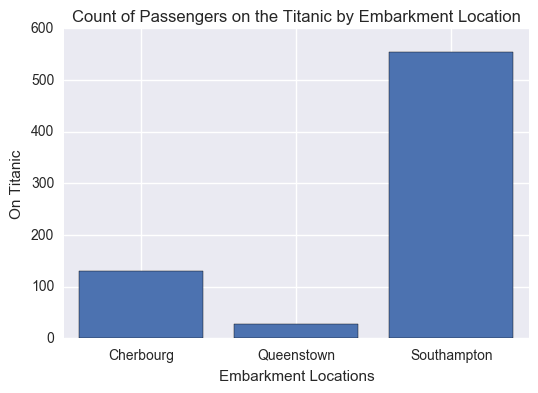

Populating the interactive namespace from numpy and matplotlib


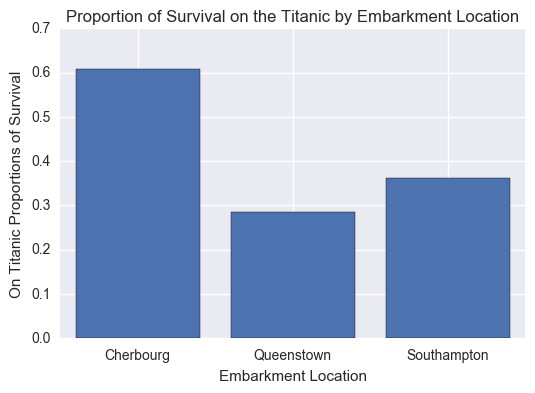

In [112]:
#Using titanic_age_drop because it is a cleaned version of titanic_df with no NAN values for Age

on_titanic = titanic_age_drop.groupby("Embarked")["Survived"].count()
location = [1,2, 3]
x_ticks = ["Cherbourg", "Queenstown", "Southampton"]

plt.bar(location, on_titanic, align = "center")

plt.xticks(location, x_ticks)
plt.xlabel("Embarkment Locations")
plt.ylabel("On Titanic")
plt.title("Count of Passengers on the Titanic by Embarkment Location")
plt.show()

%pylab inline
on_titanic_survival = titanic_age_drop.groupby("Embarked")["Survived"].mean()
x_ticks = ["Cherbourg", "Queenstown", "Southampton"]

plt.bar(location, on_titanic_survival, align = "center")

plt.xticks(location, x_ticks)
plt.xlabel("Embarkment Location")
plt.ylabel("On Titanic Proportions of Survival")
plt.title("Proportion of Survival on the Titanic by Embarkment Location")
plt.show()

Cherbourg had the highest proportion of passengers that survived, then Southampton and finally, Queenstown had the lowest proportion from all the embarkment locations. This is interesting because Southampton had the highest amount of Passengers embark than any other location, followed by Cherbourg and finally Queenstown. 

Now, we are going to check Pclass surviving passengers

Populating the interactive namespace from numpy and matplotlib


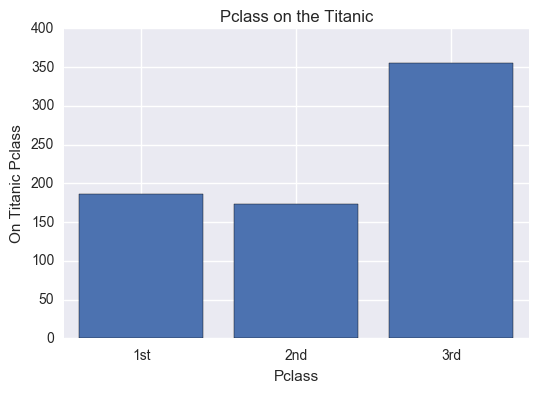

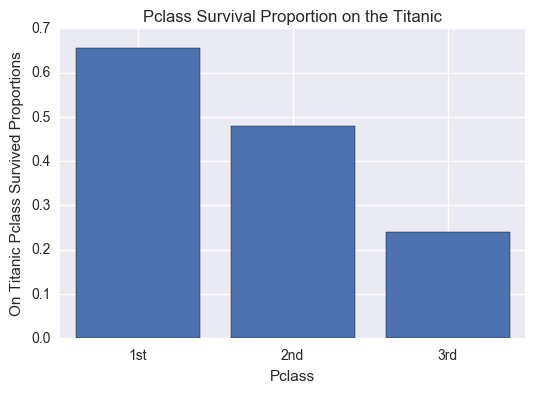

In [113]:
%pylab inline
on_titanic = titanic_df.groupby("Pclass")["Survived"].count()
location = [1,2, 3]
x_ticks = ["1st", "2nd", "3rd"]

plt.bar(location, on_titanic, align = "center")

plt.xticks(location, x_ticks)
plt.xlabel("Pclass")
plt.ylabel("On Titanic Pclass")
plt.title("Pclass on the Titanic")
plt.show()

on_titanic = titanic_df.groupby("Pclass")["Survived"].mean()
location = [1,2, 3]
x_ticks = ["1st", "2nd", "3rd"]

plt.bar(location, on_titanic, align = "center")

plt.xticks(location, x_ticks)
plt.xlabel("Pclass")
plt.ylabel("On Titanic Pclass Survived Proportions")
plt.title("Pclass Survival Proportion on the Titanic")
plt.show()

In [114]:
#Combine Embarked data with Pclass data to determine which combinatino had the highest proportion of survival
on_titanic = titanic_df.groupby(["Embarked","Pclass"], as_index = False)["Survived"].mean()
on_titanic["Survived_Count"] = titanic_df.groupby(["Embarked","Pclass"])["Survived"].sum().values
on_titanic["Passenger_Count"] = titanic_df.groupby(["Embarked","Pclass"])["Survived"].count().values

on_titanic


,Embarked,Pclass,Survived,Survived_Count,Passenger_Count
0,C,1,0.716216,53,74
1,C,2,0.533333,8,15
2,C,3,0.439024,18,41
3,Q,1,0.500000,1,2
4,Q,2,0.500000,1,2
5,Q,3,0.250000,6,24
6,S,1,0.611111,66,108
7,S,2,0.474359,74,156
8,S,3,0.210345,61,290


From this chart, we can see that every Pclass had a higher proportion of survival when they embarked on location Cherbourg. Now this is observational, because I have not tested whether there really is a difference between the independent variables that could change the outcome of the dependent variable. Another important aspect of the analysis to note, is whether independent variable is really contributing to the survival of the passenger, or if the survival should be attributed to a lurking variable. A lurking variable might be that the majority of women or children on the titanic embarked on Cherbourg. But from an observational point of view, embarking on the titanic from embarkment Queenstown has a low survival proportion compared to the other two embarkments and those who belonged to the 3rd Pclass had the lowest proportion of survivors on the Titanic.


## Investigation Recommendation

For further investigations I recommend diving into the relationship between Sex and Age_bin with regards to Pclass and embarkment. The following DataFrame tables are different slices of the data. Another situation that I would investigate is whether having children contributed to the survival of parents, and whether men who had children survived at a higher proportion that men who did not.

In [115]:
#Combine the previous DataFrame with Chart to get results for females
on_titanic = titanic_df.groupby(["Embarked","Pclass", "Sex"], as_index = False)["Survived"].mean()
on_titanic["Survived_Count"] = titanic_df.groupby(["Embarked","Pclass", "Sex"])["Survived"].sum().values
on_titanic["Passenger_Count"] = titanic_df.groupby(["Embarked","Pclass", "Sex"])["Survived"].count().values

on_titanic[on_titanic["Sex"]=="female"]



,Embarked,Pclass,Sex,Survived,Survived_Count,Passenger_Count
0,C,1,female,0.973684,37,38
2,C,2,female,1.000000,7,7
4,C,3,female,0.687500,11,16
6,Q,1,female,1.000000,1,1
8,Q,2,female,1.000000,1,1
10,Q,3,female,0.500000,5,10
12,S,1,female,0.954545,42,44
14,S,2,female,0.909091,60,66
16,S,3,female,0.407895,31,76


In [116]:
#Combine the previous DataFrame with Chart to get results for males

on_titanic[on_titanic["Sex"]=="male"]

,Embarked,Pclass,Sex,Survived,Survived_Count,Passenger_Count
1,C,1,male,0.444444,16,36
3,C,2,male,0.125000,1,8
5,C,3,male,0.280000,7,25
7,Q,1,male,0.000000,0,1
9,Q,2,male,0.000000,0,1
11,Q,3,male,0.071429,1,14
13,S,1,male,0.375000,24,64
15,S,2,male,0.155556,14,90
17,S,3,male,0.140187,30,214


In [117]:
#Now, combine Embarkment, Pclass, Sex and Age Bin and check what proportions females had in each category
on_titanic = titanic_df.groupby(["Embarked","Pclass", "Sex", "Age_Bin"], as_index = False)["Survived"].mean()
on_titanic["Survived_Count"] = titanic_df.groupby(["Embarked","Pclass", "Sex", "Age_Bin"])["Survived"].sum().values
on_titanic["Passenger_Count"] = titanic_df.groupby(["Embarked","Pclass", "Sex", "Age_Bin"])["Survived"].count().values

on_titanic[on_titanic["Sex"]=="female"]


,Embarked,Pclass,Sex,Age_Bin,Survived,Survived_Count,Passenger_Count
0,C,1,female,10-19,1.000000,5,5
1,C,1,female,20-29,1.000000,10,10
2,C,1,female,30-39,1.000000,9,9
3,C,1,female,40-49,0.875000,7,8
4,C,1,female,50-59,1.000000,6,6
12,C,2,female,0-9,1.000000,1,1
13,C,2,female,10-19,1.000000,2,2
14,C,2,female,20-29,1.000000,4,4
18,C,3,female,0-9,0.833333,5,6
19,C,3,female,10-19,0.571429,4,7


## Overall

From the analytical investigation, it is clear that gender played a vital role in surviving the titanic because women were proportionally more likely to survive than men. Age also had a relationship to survival, because it is notable that children had the highest proportion of survival to any other age group. More so, what is notable is that in every age interval of 10, the difference between proportions of survival between men and women were significantly different from, except for children. Thus children of ages 0-9 that were either male or female survived at similar, if not equal, proportions opposed to the other age intervals. 

Now, Pclass and Embarkment seemed to play a vital role as well, although this is simply based on observation. People that embarked on Southampton had a higher proportion of survival, and although it comes as no surprise, those of Pclass 1 also had a higher proportion of survival. Those that embarked on location Queenstown or were part of Pclass 3 had the highest mortality proportions. Does, those that survived the titanic at higher proportions were notably either children, women, embarked on location S or were of the upper socio-economic status. Personally, this seems to be indicative of the movie Titanic and therefore I trust my findings. 